In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)
test.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)
submission = test[["ID"]]

In [3]:
train.head()

,ID,type,time,dayofweek,models,params,queuelen,trials,duration
0,1178,9.0,0.413889,3.0,21.0,535.0,0.0,40.0,0.0
1,877,9.0,0.643056,5.0,9.0,2682.0,0.0,40.0,0.0
2,4233,13.0,0.607639,4.0,32.0,3305.0,0.0,40.0,0.0
3,4134,8.0,0.643750,4.0,3.0,22023.0,0.0,40.0,0.0
4,3598,12.0,0.519444,3.0,8.0,3707.0,0.0,40.0,0.0


In [4]:
test.head()

,ID,type,time,dayofweek,models,params,queuelen,trials
0,2439,NaN,0.590972,2.0,13.0,4615.0,0.0,40.0
1,1213,9.0,0.545833,7.0,33.0,552.0,0.0,40.0
2,2659,14.0,0.510417,3.0,2.0,2890.0,0.0,40.0
3,17,NaN,0.518056,3.0,9.0,1126.0,0.0,40.0
4,3800,11.0,0.376389,2.0,23.0,47164.0,0.0,40.0


In [5]:
print(train.shape)
print(test.shape)

(3464, 9)
(867, 8)


In [6]:
counts = train.nunique() # number of unique values in each feature
print(counts)

ID           3464
type           14
time          875
dayofweek       7
models        107
params       2529
queuelen      275
trials         12
duration        4
dtype: int64


from the counts we can see "duration" has 4 unique values so moreover this is a multiclass classification problem.
"dayofweek", "trials", "type" are categorical features

In [7]:
counts = test.nunique() # number of unique values in each feature
print(counts)

ID           867
type          14
time         514
dayofweek      7
models        78
params       747
queuelen      90
trials         7
dtype: int64


In [8]:
# removing Unnamed: 0 column, it is of no relevance to our solution
train.drop(["ID"], axis = 1, inplace = True)
test.drop(["ID"], axis = 1, inplace = True)

In [9]:
# duration has 4 unique values
print(train["duration"].unique())

[0. 1. 3. 2.]


In [10]:
# frequency of each class in dataset
print(train["duration"].value_counts())

0.0    1767
1.0    1070
2.0     418
3.0     209
Name: duration, dtype: int64


here we can see the data is imbalanced

In [11]:
# checking for null values
train.isnull().sum() 

type         360
time           0
dayofweek      0
models         0
params       273
queuelen       0
trials         0
duration       0
dtype: int64

In [12]:
train.groupby(["duration"])["params"].mean()

duration
0.0    12387.898022
1.0     7742.160606
2.0    10485.765464
3.0    14334.989744
Name: params, dtype: float64

In [13]:
train.groupby(["duration"])["type"].agg(pd.Series.mode)

duration
0.0     9.0
1.0    14.0
2.0    14.0
3.0    14.0
Name: type, dtype: float64

In [14]:
series = train["type"].isna()
for i in range(len(train)):
    if series[i] == True:
        if train["duration"][i] == 0:
            train["type"][i] = 9.0
        else:
            train["type"][i] = 14.0        

In [15]:
series = test["type"].isna()
for i in range(len(test)):
    if series[i] == True:
        test["type"][i] = 14.0 

In [16]:
series = train["params"].isna()
for i in range(len(train)):
    if series[i] == True:
        if train["duration"][i] == 0:
            train["params"][i] = 12387.898022
        elif train["duration"][i] == 1:
            train["params"][i] = 7742.160606
        elif train["duration"][i] == 2:
            train["params"][i] = 10485.765464
        else: 
            train["params"][i] = 14334.989744         

In [17]:
series = test["params"].isna()
for i in range(len(test)):
    if series[i] == True:
        test["params"][i] = 12387.898022

In [18]:
train.isnull().sum()

type         0
time         0
dayofweek    0
models       0
params       0
queuelen     0
trials       0
duration     0
dtype: int64

In [19]:
test.isnull().sum()

type         0
time         0
dayofweek    0
models       0
params       0
queuelen     0
trials       0
dtype: int64

In [20]:
print(train.shape)
print(test.shape)

(3464, 8)
(867, 7)


In [21]:
print(train.dtypes)

type         float64
time         float64
dayofweek    float64
models       float64
params       float64
queuelen     float64
trials       float64
duration     float64
dtype: object


In [22]:
train.describe()

,type,time,dayofweek,models,params,queuelen,trials,duration
count,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000
mean,9.480947,0.571791,3.246536,82.018764,10840.817111,54.402425,58.599018,0.731236
std,3.603137,0.166895,1.571793,1901.719969,24685.394507,354.209141,68.524295,0.894489
min,0.000000,0.000694,1.000000,1.000000,71.000000,0.000000,5.000000,0.000000
25%,8.000000,0.455556,2.000000,5.000000,1026.250000,0.000000,40.000000,0.000000
50%,9.000000,0.584375,3.000000,13.000000,3249.000000,0.000000,40.000000,0.000000
75%,13.000000,0.690972,5.000000,26.000000,8988.000000,0.000000,40.000000,1.000000
max,14.000000,0.991667,7.000000,87293.000000,396701.000000,5547.000000,400.000000,3.000000


In [23]:
train.head()

,type,time,dayofweek,models,params,queuelen,trials,duration
0,9.0,0.413889,3.0,21.0,535.0,0.0,40.0,0.0
1,9.0,0.643056,5.0,9.0,2682.0,0.0,40.0,0.0
2,13.0,0.607639,4.0,32.0,3305.0,0.0,40.0,0.0
3,8.0,0.643750,4.0,3.0,22023.0,0.0,40.0,0.0
4,12.0,0.519444,3.0,8.0,3707.0,0.0,40.0,0.0


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

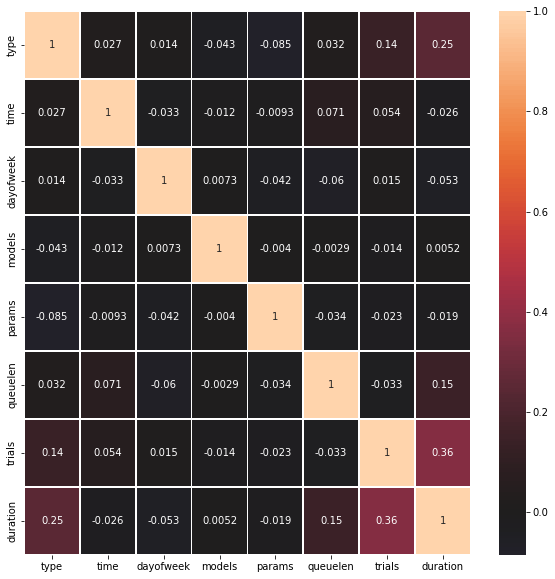

In [25]:
corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (10, 10))
g = sns.heatmap(train[top_corr_features].corr(), annot = True, center=0, linewidths=.5)

In [26]:
print(train["trials"].unique())

[ 40. 200.  20. 400. 250. 100.  22.  30.  60.  80.   5. 300.]


In [27]:
print(test["trials"].unique())

[ 40. 400.  20. 200. 100.  22. 300.]


In [28]:
train.groupby(['trials'])['trials'].count()
# 5 - 40
# 30 - 40
# 60 - 40
# 80 - 40
# 250 - 40

trials
5.0         1
20.0      208
22.0        6
30.0        2
40.0     2856
60.0        3
80.0        7
100.0     125
200.0     155
250.0       1
300.0       1
400.0      99
Name: trials, dtype: int64

In [29]:
test.groupby(['trials'])['trials'].count()

trials
20.0      64
22.0       3
40.0     711
100.0     28
200.0     33
300.0      1
400.0     27
Name: trials, dtype: int64

In [30]:
to_get_rid_of = [5, 30, 60, 80, 250]
for i in range(len(train)):
    if train["trials"][i] in to_get_rid_of:
        train["trials"][i] = 40

In [31]:
train = pd.get_dummies(train, columns=["dayofweek"], prefix="day", drop_first = True)

In [32]:
train = pd.get_dummies(train, columns=["type"], prefix="type", drop_first = True)

In [33]:
train = pd.get_dummies(train, columns=["trials"], prefix="trial", drop_first = True)

In [34]:
test = pd.get_dummies(test, columns=["dayofweek"], prefix="day", drop_first = True)

In [35]:
test = pd.get_dummies(test, columns=["type"], prefix="type", drop_first = True)

In [36]:
test = pd.get_dummies(test, columns=["trials"], prefix="trials", drop_first = True)

In [37]:
train.head()

,time,models,params,queuelen,duration,day_2.0,day_3.0,day_4.0,day_5.0,day_6.0,...,type_11.0,type_12.0,type_13.0,type_14.0,trial_22.0,trial_40.0,trial_100.0,trial_200.0,trial_300.0,trial_400.0
0,0.413889,21.0,535.0,0.0,0.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.643056,9.0,2682.0,0.0,0.0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0.607639,32.0,3305.0,0.0,0.0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0.643750,3.0,22023.0,0.0,0.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.519444,8.0,3707.0,0.0,0.0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [38]:
test.head()

,time,models,params,queuelen,day_2.0,day_3.0,day_4.0,day_5.0,day_6.0,day_7.0,...,type_11.0,type_12.0,type_13.0,type_14.0,trials_22.0,trials_40.0,trials_100.0,trials_200.0,trials_300.0,trials_400.0
0,0.590972,13.0,4615.0,0.0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,0.545833,33.0,552.0,0.0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0.510417,2.0,2890.0,0.0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,0.518056,9.0,1126.0,0.0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,0.376389,23.0,47164.0,0.0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [39]:
duration = train["duration"]
train.drop(["duration"], axis = 1, inplace = True)
train["duration"] = duration
train.head()

,time,models,params,queuelen,day_2.0,day_3.0,day_4.0,day_5.0,day_6.0,day_7.0,...,type_12.0,type_13.0,type_14.0,trial_22.0,trial_40.0,trial_100.0,trial_200.0,trial_300.0,trial_400.0,duration
0,0.413889,21.0,535.0,0.0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.0
1,0.643056,9.0,2682.0,0.0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0.0
2,0.607639,32.0,3305.0,0.0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0.0
3,0.643750,3.0,22023.0,0.0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0.0
4,0.519444,8.0,3707.0,0.0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0.0


In [40]:
# pip install -U imbalanced-learn
# check version number
import imblearn
print(imblearn.__version__)

0.9.0


Class = 0, n = 1767 (51.010%)
Class = 1, n = 1070 (30.889%)
Class = 3, n = 209 (6.033%)
Class = 2, n = 418 (12.067%)


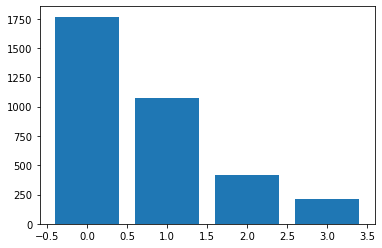

In [41]:
# load and summarize the dataset
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

data = train.to_numpy()
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print("Class = %d, n = %d (%.3f%%)" % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class = 0, n = 1767 (25.000%)
Class = 1, n = 1767 (25.000%)
Class = 3, n = 1767 (25.000%)
Class = 2, n = 1767 (25.000%)


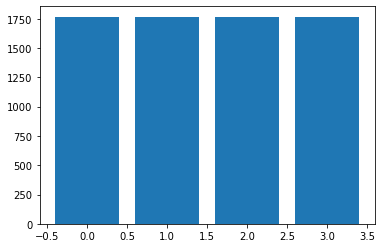

In [42]:
# example of oversampling a multi-class classification dataset
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from numpy import where

data = train.to_numpy()
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = BorderlineSMOTE() # synthetic minority oversampling technique
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class = %d, n = %d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [45]:
X = pd.DataFrame(X)
X["29"] = y
X.head()

In [49]:
# cost sensitive random forest with default class weights
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# evaluate a model
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define the location of the dataset
# data = train.values
# load the dataset
X, y = data[:, :-1], data[:, -1]
y = LabelEncoder().fit_transform(y)

# define the reference model
model = RandomForestClassifier(n_estimators=1000, class_weight='balanced')
# evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.822 (0.012)


In [50]:
data = test.to_numpy()
X_test = data

In [51]:
model.fit(X, y)
y_pred = model.predict(X_test)

In [52]:
submission["duration"] = y_pred

In [53]:
submission

,ID,duration
0,2439,1
1,1213,1
2,2659,1
3,17,1
4,3800,0
...,...,...
862,416,0
863,1612,2
864,2475,2
865,227,0


In [54]:
submission.to_csv("submission.csv", index = None)